<a href="https://colab.research.google.com/github/chaos1231107/information_tech/blob/main/%ED%85%8C%EC%8A%AC%EB%9D%BC%EC%A3%BC%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install yfinance


In [4]:
import yfinance as yf
import datetime

# 테슬라(TSLA) 주식의 데이터를 가져오기 위해 yf.Ticker()를 사용합니다.
tesla = yf.Ticker("TSLA")

# 오늘 날짜부터 10년 전의 날짜 계산
start_date = datetime.datetime.now() - datetime.timedelta(days=10*365)

# yfinance의 history() 함수를 사용하여 주가 데이터를 가져옵니다.
tesla_data = tesla.history(start=start_date)

print(tesla_data)


                                 Open        High         Low       Close  \
Date                                                                        
2013-11-18 00:00:00-05:00    9.018000    9.030000    7.974000    8.105333   
2013-11-19 00:00:00-05:00    7.962000    8.600000    7.948000    8.406000   
2013-11-20 00:00:00-05:00    8.405333    8.496667    7.937333    8.074000   
2013-11-21 00:00:00-05:00    8.192667    8.319333    8.016667    8.140000   
2013-11-22 00:00:00-05:00    8.105333    8.183333    7.862000    8.092000   
...                               ...         ...         ...         ...   
2023-11-07 00:00:00-05:00  219.979996  223.119995  215.720001  222.179993   
2023-11-08 00:00:00-05:00  223.149994  224.149994  217.639999  222.110001   
2023-11-09 00:00:00-05:00  219.750000  220.800003  206.679993  209.979996   
2023-11-10 00:00:00-05:00  210.029999  215.380005  205.690002  214.649994   
2023-11-13 00:00:00-05:00  215.600006  225.399994  211.610001  223.710007   

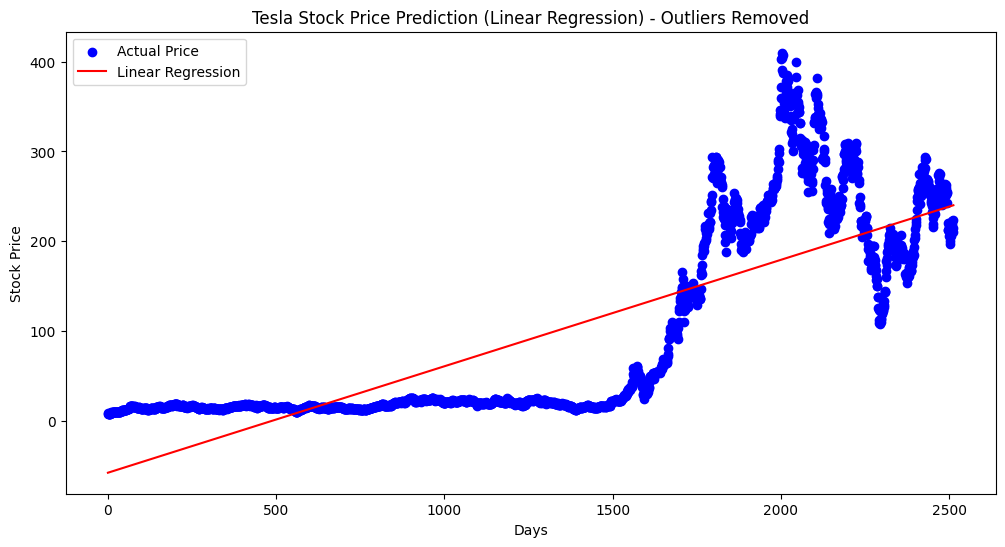

In [5]:
import yfinance as yf
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 테슬라(TSLA) 주식의 데이터를 가져오기 위해 yf.Ticker()를 사용합니다.
tesla = yf.Ticker("TSLA")

# 오늘 날짜부터 10년 전의 날짜 계산
start_date = datetime.datetime.now() - datetime.timedelta(days=10*365)

# yfinance의 history() 함수를 사용하여 주가 데이터를 가져옵니다.
tesla_data = tesla.history(start=start_date)

# 'Close' 컬럼(주식 종가)을 사용하여 X와 y 데이터를 준비합니다.
X = np.array(range(len(tesla_data))).reshape(-1, 1)
y = tesla_data['Close'].values

# 이상치를 식별하고 제거하기 위한 IQR 계산
Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)
IQR = Q3 - Q1

# 이상치 경계 값을 설정합니다. 일반적으로 1.5 * IQR을 사용합니다.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 제외한 데이터 필터링
filtered_indices = np.where((y >= lower_bound) & (y <= upper_bound))
X_filtered = X[filtered_indices]
y_filtered = y[filtered_indices]

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_filtered, y_filtered)

# 예측 결과를 얻기 위해 X_filtered 데이터를 사용하여 모델 예측
y_pred = model.predict(X_filtered)

# 시각화를 통해 이상치 제거 후의 실제 주가와 선형 회귀 예측 값을 비교
plt.figure(figsize=(12, 6))
plt.scatter(X_filtered, y_filtered, color='blue', label='Actual Price')  # 이상치 제거 후 실제 주가
plt.plot(X_filtered, y_pred, color='red', label='Linear Regression')  # 선형 회귀 예측
plt.title('Tesla Stock Price Prediction (Linear Regression) - Outliers Removed')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


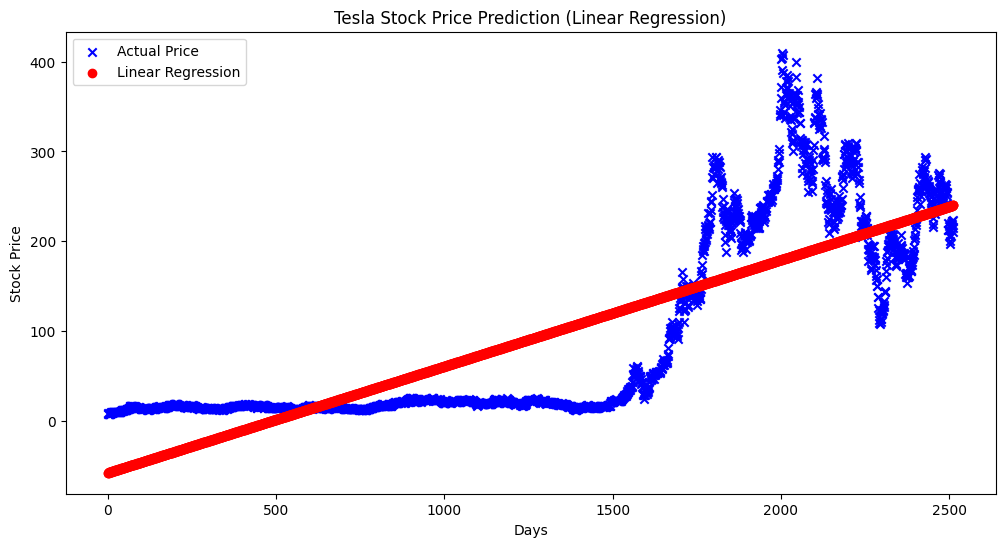

In [6]:
import yfinance as yf
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

tesla = yf.Ticker("TSLA")
start_date = datetime.datetime.now() - datetime.timedelta(days=10*365)


tesla_data = tesla.history(start=start_date)

X = np.array(range(len(tesla_data))).reshape(-1, 1)
y = tesla_data['Close'].values

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 예측 결과를 얻기 위해 X 데이터를 사용하여 모델 예측
y_pred = model.predict(X)

# 시각화를 통해 실제 주가와 선형 회귀 예측 값을 비교
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Price', marker='x')  # 실제 주가
plt.scatter(X, y_pred, color='red', label='Linear Regression',marker='o')  # 선형 회귀 예측
plt.title('Tesla Stock Price Prediction (Linear Regression)')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
